<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/C%C3%B3pia_de_Aula18_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Processos de aceleração na resolução de equações diferencias em problemas de otimização**

**O caso da resolução de equações da forma $f(u)=0$**

José Claudinei Ferreira

Departamento de Matemática da Universidade Federal de Alfenas

## **Resolvendo outra equação**

Vamos usar o argumento de minimização para resolver a equação que apareceu na Avaliação I-b, a saber 
$$\begin{cases}3(x-1)^2+4(y-2)^2-40&=&0\\xy+y^2-2&=&0\end{cases}.\tag{1}$$

Vamos chamar cada equação de $g_i(u)$, como definido a seguir:

Text(0.5, 1.0, 'Curvas de ni\xadvel de g1 e g2D: restrição de domínio')

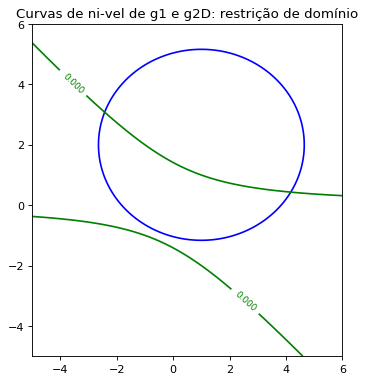

In [ ]:
import math, numpy as np, matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d             # para fazer gráficos 

def g1(u):  
  x=u[0]
  y=u[1]
  p=3*(x-1)**2+4*(y-2)**2-40
  return p

def g2(u):
  x=u[0]
  y=u[1]
  p=x*y+y**2-2
  return p

#---------------------------------------- Para fazer gráficos de g1(x,y) e g2(x,y)
xf,yf = np.mgrid[-5:6:100j,-5:6:100j]
wg1=0*xf
wg2=0*xf

for i in range(0,100): 
  for j in range(0,100): 
    wg1[i][j]=g1([xf[i][j],yf[i][j]])
    wg2[i][j]=g2([xf[i][j],yf[i][j]])
    
# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
CS = ax.contour(xf, yf, wg1,[0],colors='blue')
CS = ax.contour(xf, yf, wg2,[0],colors='green')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de ni­vel de g1 e g2D: restrição de domínio") 

Uma solção da equação é um ponto em que as curvas $g_1(u)=0$, em azul, e $g_2(u)=0$, em verde, têm intersecção.

Redefinindo como $F(u)=(g_1(u),g_2(u))^T=(0,0)^T$, para $$F(u)=\begin{bmatrix}3(x-1)^2+4(y-2)^2-40\\xy+y^2-2\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix}.$$ 

Vamos resolver a equação 
 $$\begin{cases} u'&=&-\nabla g(u)\\\\u(0)&=&u_0\end{cases},\tag{2}$$
 pelo método de Euler, para determinar ponto de mínimo no problema de otimização $$\min_ug(u)=0,\tag{3}$$ em que $$g(u)=\frac{1}{2}\|F(u)\|^2=\frac{1}{2}\langle F(u),F(u)\rangle=\frac{1}{2}F(u)^TF(u),$$ em que $\langle u, v\rangle$ denota o produto escalar entre os vetores $u$ e $v$.

 Segue da [regra da cadeia](https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Calculus_(OpenStax)/14%3A_Differentiation_of_Functions_of_Several_Variables/14.5%3A_The_Chain_Rule_for_Multivariable_Functions) que $$\nabla g(u)=\left[JF(u)\right]^TF(u),$$ em que $\left[JF(u)\right]^T$ denota a transposta da [matriz jacobiana](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) de $F(u)$.

 
 
 Definimos no que segue $F(u)$, $JF(u)$, $g(u)$ e $\nabla g(u)$ .

In [ ]:
def F(u):
  p=[g1(u),g2(u)]
  return np.array(p)

def JF(u):
  x=u[0]
  y=u[1]
  p1=[6*(x-1),8*(y-2)]      # gradg1
  p2=[y,x+2*y]              # gradg2
  p=[p1,p2]
  return np.array(p)

def g(u):
  return np.dot(F(u),F(u))/2 # produto escalar de F(u) com F(u)

def Gradg(u):
  p=np.dot(np.transpose(JF(u)),F(u))
  return np.array(p)

Podemos agora utilizar o método de Método de Euler para resolver a Equação $(2)$, com condição inicial $u_0=(-4,-4)$ e $h=0.001$, para estimar $u(b)$, no caso com $b=30$. 

In [ ]:
def Euler(u0,b,h):
  n=int(b/h)
  u=[]
  ye=[]
  xe=[]
  u.append(u0)
  ye.append(u[0][1])
  xe.append(u[0][0])
  fu=[]
  fu.append(g(u[0]))

  t=np.linspace(0,b,n+1)

  for i in range(1,n+1):
      u.append(u[i-1]-h*Gradg(u[i-1]))  # u_(i+1)=u_i+hf(t_0+ih,u_i) método de Euler
      xe.append(u[i][0])
      ye.append(u[i][1])
      fu.append(g(u[i]))
      
      
  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')

  # Criando a figura e projeção em 3D
  ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
  CS = ax.contour(xf, yf, wg1,[0],colors='blue')
  CS = ax.contour(xf, yf, wg2,[0],colors='green')
  ax.clabel(CS, inline=0.5, fontsize=8)
  ax.set_title('Curvas de ni­vel de g1 e g2D: restrição de domínio') 
  plt.plot(xe,ye,color='red',label='u(t)=(x(t),y(t)) por Euler')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,fu,color='red',label='g(u(t))=g(x(t),y(t)) por Euler')
  plt.ylabel('g(u(t))')
  plt.xlabel('t')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

Obtemos os gráficos:

Solucao aproximada u=[-2.43159921  3.08078451]
Gradiente no ponto aproximado Gradg(u)=[1.80594897e-13 2.18649993e-13]
Valor aproximado de F(u)=[0.00000000e+00 5.86197757e-14]
Valor aproximado de g(u)=1.7181390515713637e-27


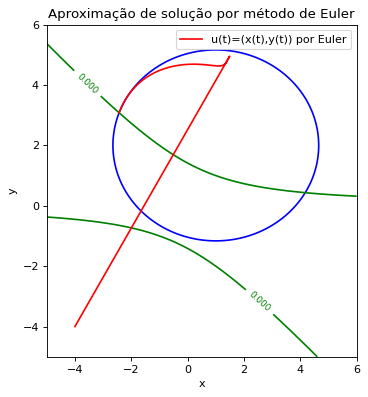

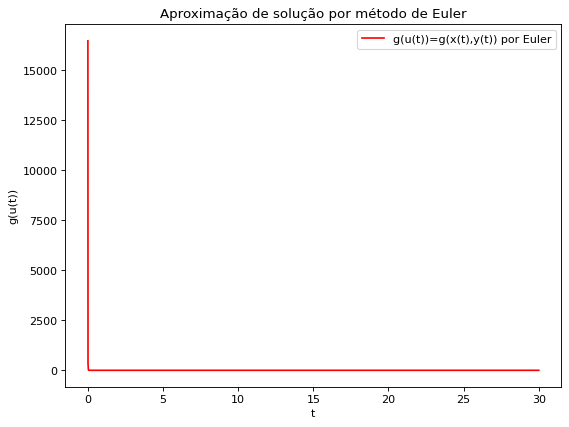

In [ ]:
Euler([-4,-4],30,0.001)

**Aproximando $JF(u)$, $\nabla g(u)$ e $Hg(u)$**

Muitas vezes as funções envolvidas em um problema possuem expresões muito complicadas ou muitas variáveis. Isso dificulta o uso de regras de Cálculo para determinar derivadas com $JF(u)$, $\nabla g(u)$ e $Hg(u)$.

Lembramos brevemente formas de fazermos aproximações dessas funções. Usando o polinômio de Taylor de ordem 1, por exemplo, obtemos as seguintes aproximações:
$$\nabla g(u)\approx \frac{1}{k}\left(g(x+k,y)-g(x,y),g(x,y+k)-g(x,y)\right),\qquad k\approx 0.$$

Para a aproximação de $$\nabla F(u)$$ basta usarmos o argumento anterior e observar que $$\nabla F(u)=\begin{bmatrix}\nabla g_1(u)\\\nabla g_2(u)\end{bmatrix}.$$ 

Para aproximarmos a matriz Hessiana de $g(u)$ basta observarmos que 
$$Hg(u)=J(\nabla g)(u)$$ e usar os argumentos anteriores.

Veja como pode fazer isso em Phyton:

In [ ]:
def nJF(u):
  x=u[0]
  y=u[1]
  h=10**(-8)
  p1=np.array([g1([x+h,y])-g1([x,y]),g1([x,y+h])-g1([x,y])])/h     # gradg1
  p2=np.array([g2([x+h,y])-g2([x,y]),g2([x,y+h])-g2([x,y])])/h     # gradg2
  p=[p1,p2]
  return np.array(p)


def nGradg(u):
  h=10**(-8)
  v=[]
  v.append(u[0]+h)
  v.append(u[1])
  dx=(g(v)-g(u))/(h)
  v=[]
  v.append(u[0])
  v.append(u[1]+h)
  dy=(g(v)-g(u))/(h)
  return np.array([dx,dy])

def nHg(u):
  x=u[0]
  y=u[1]
  def g1(w):
    return nGradg(w)[0]
  def g2(w):
    return nGradg(w)[1]
  h=10**(-8)
  p1=np.array([g1([x+h,y])-g1([x,y]),g1([x,y+h])-g1([x,y])])/h     # gradg1
  p2=np.array([g2([x+h,y])-g2([x,y]),g2([x,y+h])-g2([x,y])])/h             # gradg2
  p=[p1,p2]
  return np.array(p)


Teste de aproximação

In [ ]:
print(f'Jacobiano de F(u) aproximado {nJF([2,1])}')
print(f'Jacobiano de F(u) {JF([2,1])}')
 
print(f'Gradiente de G(u) aproximado {nGradg([2,1])}')
print(f'Gradiente de G(u) {Gradg([2,1])}')

print(f'Hessiana de G(u) aproximado {nHg([2,1])}')

Jacobiano de F(u) aproximado [[ 5.99999979 -7.99999995]
 [ 0.99999999  3.99999998]]
Jacobiano de F(u) [[ 6 -8]
 [ 1  4]]
Gradiente de G(u) aproximado [-196.99999712  267.99999659]
Gradiente de G(u) [-197  268]
Hessiana de G(u) aproximado [[-1136.86837722  1136.86837722]
 [ 1136.86837722     0.        ]]


O método de Euler para a aproximação de solução da Equação $(2)$, usando aproximação para $\nabla g(u)$.

In [ ]:
def Eulerap(u0,b,h):
  n=int(b/h)
  u=[]
  ye=[]
  xe=[]
  u.append(u0)
  ye.append(u[0][1])
  xe.append(u[0][0])
  fu=[]
  fu.append(g(u[0]))

  t=np.linspace(0,b,n+1)

  for i in range(1,n+1):
      u.append(u[i-1]-h*Gradg(u[i-1]))  # u_(i+1)=u_i+hf(t_0+ih,u_i) método de Euler
      xe.append(u[i][0])
      ye.append(u[i][1])
      fu.append(g(u[i]))
      
      
  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')

  # Criando a figura e projeção em 3D
  ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
  CS = ax.contour(xf, yf, wg1,[0],colors='blue')
  CS = ax.contour(xf, yf, wg2,[0],colors='green')
  ax.clabel(CS, inline=0.5, fontsize=8)
  ax.set_title('Curvas de ni­vel de g1 e g2D: restrição de domínio') 
  plt.plot(xe,ye,color='red',label='u(t)=(x(t),y(t)) por Euler')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,fu,color='red',label='g(u(t))=g(x(t),y(t)) por Euler')
  plt.ylabel('g(u(t))')
  plt.xlabel('t')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

Aparentemente o método funciona de forma semelhante àquele com gradiente exato de $g(u)$, mas pode-se verificar que é mais lento. Vejamos os gráficos:

Solucao aproximada u=[-2.43159921  3.08078451]
Gradiente no ponto aproximado Gradg(u)=[1.80594897e-13 2.18649993e-13]
Valor aproximado de F(u)=[0.00000000e+00 5.86197757e-14]
Valor aproximado de g(u)=1.7181390515713637e-27


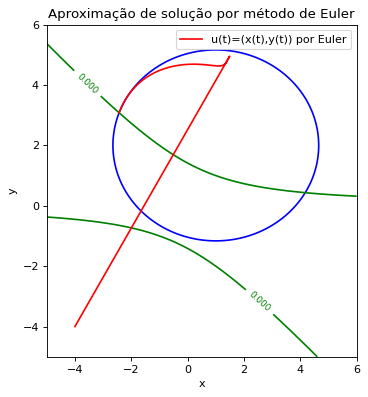

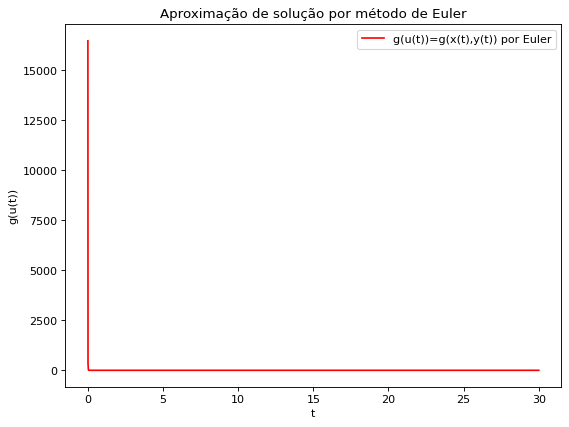

In [ ]:
Eulerap([-4,-4],30,0.001)

#**Sobre a velocidade de convergência**

Observe que precisamos de $n=$

In [ ]:
print(int(30/0.001))

30000


Iterações do método de Euler para obermos ama solução da Equação $(2)$.

Vamos tentar obter uma solução com menos iterações. Para isso, vamos deixar de seguir exatamente a curva olução da Equação $(2)$ e focarmos no problema $(3)$, mas seguindo a direção de maior decrescimento de $g(u)$.

Vamos supor que $u_0$ está próximo de um ponto de mínimo local de $g(u)$ e utilizar o método de Euler da forma $$\begin{cases}u_0&=&\text{escolha inicial}\\\\h_i&=&\displaystyle \frac{\langle \nabla g(u_i),\nabla g(u_i))}{\langle Hg(u_i)\nabla g(u_i)),\nabla g(u_i))\rangle}\\\\u_{i+1}&=&u_i-h_i\nabla g(u_i),\end{cases},$$ em que $h_i$ varia em cada passo.

Para escolhermos esse passo bascamos minimizar $$g(u_{i+1})=g(u_i-h\nabla g(u_i)),$$ visto como função de $h$, porque $u_i$ e $\nabla g(u_i)$ são conhecidos, na iteração $i$. 

Derivando em relação a $h$ e usando a regra da cadeia, temos que, no ponto de mínimo, nessa direção, vale a igualdade $$0=\frac{dg(u_{i+1})}{dh}=\langle \nabla g(u_i-h\nabla g(u_i)),-\nabla g(u_i))\rangle.\tag{4}$$

Usando agora o [polinômio de Taylor de ordem 1](https://en.wikipedia.org/wiki/Taylor%27s_theorem#Generalizations_of_Taylor's_theorem), para $\nabla g(v)$, como 
$$\nabla g(v+k)\approx \nabla g(v)+Hg(v)k,$$ em que $Hg(v)$ é a matriz hessiana (ou derivada segunda) de $g(u)$. 

Tomando $v=u_i$ e $k=-h\nabla g(u_i))$ reescrevemos a Equação $(4)$ como 
$$0=\frac{dg(u_{i+1})}{dh}\approx\langle \nabla g(u_i)-hHg(u_i)\nabla g(u_i)),-\nabla g(u_i))\rangle=-\langle \nabla g(u_i),\nabla g(u_i))\rangle +\langle Hg(u_i)\nabla g(u_i)),\nabla g(u_i))\rangle.\tag{4*}$$

Isso nos diz que $$h_i\approx \frac{\langle \nabla g(u_i),\nabla g(u_i))}{\langle Hg(u_i)\nabla g(u_i)),\nabla g(u_i))\rangle},$$ e que $h_i>0$ quando $u_i$ não for ponto de mínimo, mas estiver suficentemente próximo de um.

Resolvemos novamente a Equação $(2)$ usando esse controle no tamanho do passo $h$ e usando aproximações para $\nabla g(u)$ e $Hg(u)$ que fizemos anteriormente. Note que agora iniciamos com $u_0=(-2,-1)$.

In [ ]:
def Eulerac(u0,n):                                                # Nesse caso definimos o número de iterações 
  u=[]
  ye=[]
  xe=[]
  u.append(u0)                                    # Condição inicial
  ye.append(u[0][1])
  xe.append(u[0][0])
  fu=[]
  fu.append(g(u[0]))
  h=[]

  t=np.linspace(0,b,n+1)

  for i in range(1,n+1):
      v=nGradg(u[i-1])
      hi=(np.dot(v,v))/(np.dot(np.dot(nHg(u[i-1]),v),v))
      h.append(hi)
      u.append(u[i-1]-hi*v)  # u_(i+1)=u_i+hf(t_0+ih,u_i) método de Euler
      xe.append(u[i][0])
      ye.append(u[i][1])
      fu.append(g(u[i]))
  h.append(0) 
      
  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')
  # Criando a figura e projeção em 3D
  ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
  CS = ax.contour(xf, yf, wg1,[0],colors='blue')
  CS = ax.contour(xf, yf, wg2,[0],colors='green')
  ax.clabel(CS, inline=0.5, fontsize=8)
  ax.set_title('Curvas de ni­vel de g1 e g2D: restrição de domínio') 
  plt.plot(xe,ye,color='red',label='u(t)=(x(t),y(t)) por Euler')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,fu,color='red',label='g(u(t))=g(x(t),y(t)) por Euler')
  plt.ylabel('g(u(t))')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,h,color='red',label='hi aproximado')
  plt.ylabel('h(i)')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de passo para método de Euler')
  plt.show()

Vejamos graficamente o comportamento da trajetória das aproximações:

Solucao aproximada u=[4.17241261 0.43416199]
Gradiente no ponto aproximado Gradg(u)=[-1.81355352e-06 -9.07962214e-07]
Valor aproximado de F(u)=[-8.62782699e-08 -3.94534515e-07]
Valor aproximado de g(u)=8.155071179880629e-14


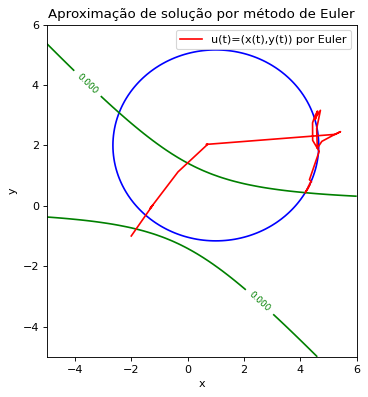

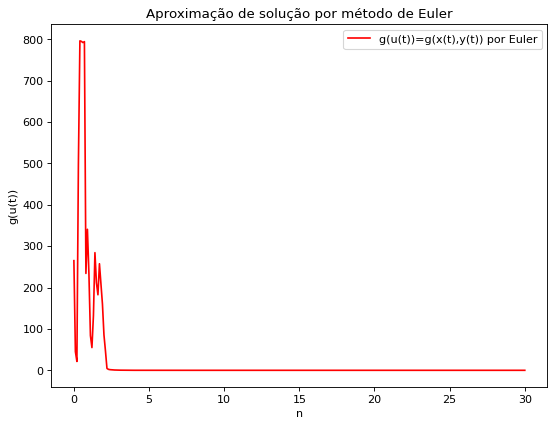

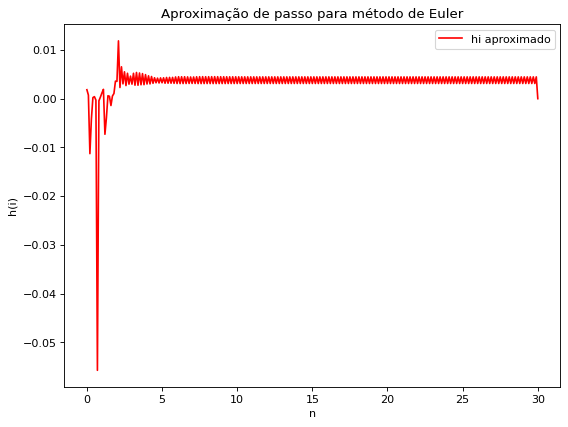

In [ ]:
Eulerac([-2,-1],300)

Cabe destar que dependendo da condição inicial, pode ocorrer de $Hg(u_i)$ possuir autovalor negativo, o que faz com queo gráfico de $g(u)$ tenha concavidade para baixo e um ponto de máximo próximo, ou um ponto de sela, por perto. Pode ocorrer de $Hg(u_i)\nabla g(u_i)$ ser nulo também. Isso faz com que $h_i$ seja negaitvo em alguns pontos e pode fazer com o método com aceleração seja divergente em algumas condições iniciais, como no caso em que $u_0=(-4,-4)$. 

Quando $Hg(u_i)\nabla g(u_i)$ não é nulo, podemos tentar contornar isso usando $|h_i|$ no lugar de $h_i$, como no exemplo que segue:

In [ ]:
def Euleracmod(u0,n):                                                # Nesse caso definimos o número de iterações 
  u=[]
  ye=[]
  xe=[]
  u.append(u0)                                    # Condição inicial
  ye.append(u[0][1])
  xe.append(u[0][0])
  fu=[]
  fu.append(g(u[0]))
  h=[]

  t=np.linspace(0,b,n+1)

  for i in range(1,n+1):
      v=nGradg(u[i-1])
      hi=(np.dot(v,v))/(np.dot(np.dot(nHg(u[i-1]),v),v))
      h.append(hi)
      u.append(u[i-1]-abs(hi)*v)  # u_(i+1)=u_i+hf(t_0+ih,u_i) método de Euler
      xe.append(u[i][0])
      ye.append(u[i][1])
      fu.append(g(u[i]))
  h.append(0) 
      
  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')
  # Criando a figura e projeção em 3D
  ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
  CS = ax.contour(xf, yf, wg1,[0],colors='blue')
  CS = ax.contour(xf, yf, wg2,[0],colors='green')
  ax.clabel(CS, inline=0.5, fontsize=8)
  ax.set_title('Curvas de ni­vel de g1 e g2D: restrição de domínio') 
  plt.plot(xe,ye,color='red',label='u(t)=(x(t),y(t)) por Euler')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,fu,color='red',label='g(u(t))=g(x(t),y(t)) por Euler')
  plt.ylabel('g(u(t))')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,h,color='red',label='hi aproximado')
  plt.ylabel('h(i)')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de passo para método de Euler')
  plt.show()

Vejamos os gráficos:

Solucao aproximada u=[-0.75992999 -0.77493831]
Gradiente no ponto aproximado Gradg(u)=[-0.35591742 -0.1965359 ]
Valor aproximado de F(u)=[ 0.09319126 -0.81057175]
Valor aproximado de g(u)=0.332855585944879


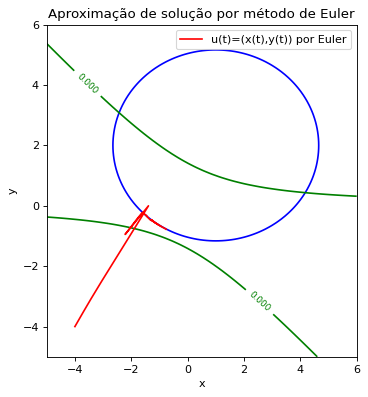

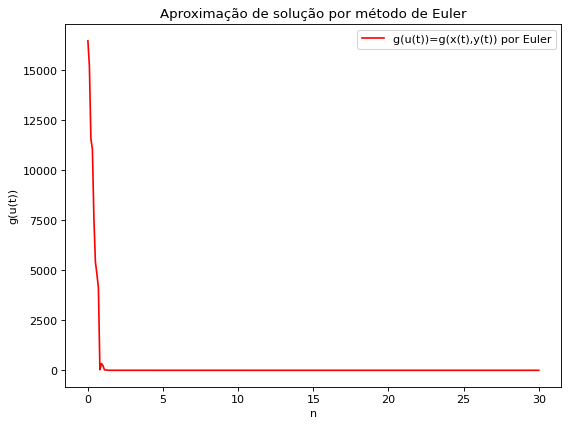

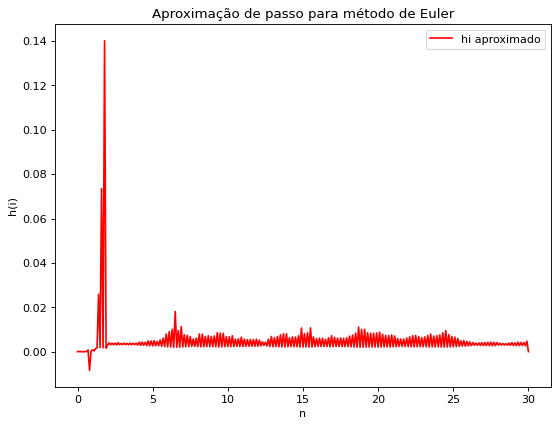

In [ ]:
Euleracmod([-4,-4],300)

Note que obtemos um ponto de mínimo logal $u$, que não é global, ou seja, $g(u)\neq 0$.

Vejamos a forma de alguns cortes no gráfico de $g(u)$ para reforçar isso:

Text(0.5, 1.0, 'Curvas de ni\xadvel de g')

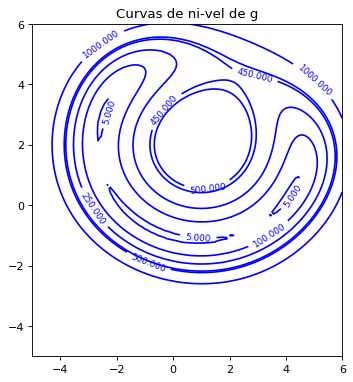

In [ ]:
#---------------------------------------- Para fazer gráficos de g1(x,y) e g2(x,y)
xf,yf = np.mgrid[-5:6:100j,-5:6:100j]
wg=0*xf

for i in range(0,100): 
  for j in range(0,100): 
    wg[i][j]=g([xf[i][j],yf[i][j]])
    
# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
CS = ax.contour(xf, yf, wg,[5,100,250,450,500,1000],colors='blue')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de ni­vel de g") 

As curvas de nível de $g(u)$ nos mostram que realmente há pontos de máximo local e de sela.

#**Sobre outra forma de aceleração**

Como vimos, uma solução da equação $$F(u)=\begin{bmatrix}3(x-1)^2+4(y-2)^2-40\\xy+y^2-2\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix},$$ pode ser  
encontrada por meio da equação 
 $$\begin{cases} u'&=&-\left[JF(u)\right]^TF(u)\\\\u(0)&=&u_0\end{cases}.\tag{2*}$$

Observe que, se $u(t)$ for uma solução dessa equação, então pela regra da cadeia
$$\frac{dg(u(t))}{dt}=\langle \nabla g(u(t)),u'(t)\rangle = \langle \left[JF(u)\right]^TF(u),-\left[JF(u)\right]^TF(u)\rangle=-\|\left[JF(u)\right]^TF(u)\|^2\leq 0,$$ e segue que $g(u(t))$ será decrescente, quando $u'(t)\neq 0$, o que era desejado, quando escolhemos a direção de maior decrescimento, que é $-\nabla g(u)=-\left[JF(u)\right]^TF(u)$.

Entretanto, se trocarmos a equação $(2)$ por outras equações, podemos encontrar direções em que $g(u(t))$ também decresce. 

Um exemplo disso é trocarmos $\left[JF(u)\right]^T$ por $\left[JF(u)\right]^{-1}$, quando este último existir, na equação $(2^*)$ e obtermos a equação  $$\begin{cases} u'&=&-\left[JF(u)\right]^{-1}F(u)\\\\u(0)&=&u_0\end{cases}.\tag{5}$$

Observe agora que, se $u(t)$ for uma solução dessa equação $(5)$, então pela regra da cadeia
$$\frac{dg(u(t))}{dt}=\langle \nabla g(u(t)),u'(t)\rangle = \langle \left[JF(u)\right]^TF(u),-\left[JF(u)\right]^{-1}F(u)\rangle= -\left[\left[JF(u)\right]^TF(u)\right]^T\left[JF(u)\right]^{-1}F(u)=-\|F(u)\|^2=-2g(u(t))\leq 0,$$ e segue que $g(u(t))$ será decrescente, quando $u'(t)\neq 0$, o que é desejado. Note ainda que o decrescimento de $g(u(t))$ depende agora só de $g(u(t))$, e que vale a igualdade
$$\frac{dg(u(t))}{dt}=-2g(u(t)),$$ que nos diz que 
$$g(u(t))=g(u_0)e^{-2t}$$ e que $u(t)$ converge rápido para um ponto de mínimo de $g(u)$, quando $\left[JF(u)\right]^{-1}$ sempre existir em torno desse ponto de mínimo, e quando escolhermos $u_0$ o suficientemente próximo desse ponto de mínimo.

Nesse caso o método de Euler toma a forma:
$$\begin{cases}u_0&=&\text{escolha inicial}\\\\JF(u_i)w_i&=&-hF(u_i)\\\\u_{i+1}&=&u_i+w_i,\end{cases}.$$

**Caso particluar, em dimensão 2**

Em dimensão 2 é simples calcular $\left[JF(u)\right]^{-1}$ como fazemos a seguir:

In [ ]:
def iJF(u):
  A=JF(u)
  d=A[0][0]*A[1][1]-A[0][1]*A[1][0]
  B=[[A[1][1],-A[1][0]],[-A[0][1],A[0][0]]]
  return np.transpose(np.array(B))/d

# Teste
u=[2,3]
print(iJF(u))
print(np.dot(iJF(u),JF(u)))

[[ 0.33333333 -0.33333333]
 [-0.125       0.25      ]]
[[1. 0.]
 [0. 1.]]


Podemos então usar, nesse caso, o método de Euler toma a forma:
$$\begin{cases}u_0&=&\text{escolha inicial}\\\\u_{i+1}&=&u_i-h\left[JF(u_i)\right]^{-1}F(u_i)\end{cases}$$
como fazemos no que segue:

In [ ]:
def Newton(u0,h,b):
  n=int(b/h)
  u=[]
  ye=[]
  xe=[]
  fu=[]
  u.append(u0)
  ye.append(u[0][1])
  xe.append(u[0][0])
  fu.append(g(u[0]))
  t=np.linspace(0,b,n+1)
  
  for i in range(1,n+1):
    u.append(u[i-1]-h*np.dot( iJF(u[i-1]),F(u[i-1]) ) )                           # u_(i+1)=u_i+hf(t_0+ih,u_i) método de Euler
    xe.append(u[i][0])
    ye.append(u[i][1])
    fu.append(g(u[i]))


  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')
  # Criando a figura e projeção em 3D
  ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
  CS = ax.contour(xf, yf, wg1,[0],colors='blue')
  CS = ax.contour(xf, yf, wg2,[0],colors='green')
  ax.clabel(CS, inline=0.5, fontsize=8)
  ax.set_title('Curvas de ni­vel de g1 e g2D: restrição de domínio') 
  plt.plot(xe,ye,color='red',label='u(t)=(x(t),y(t)) por Euler')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,fu,color='red',label='g(u(t))=g(x(t),y(t)) por Euler')
  plt.ylabel('g(u(t))')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de solução por método de Euler')
  plt.show()
  

Vejamos graficamente algumas trajetórias,para estimar $u(b)$, com $u_0=[0,1]$ e $b=30$, primeiro com $=0.001$

Solucao aproximada u=[-2.43159921  3.08078451]
Gradiente no ponto aproximado Gradg(u)=[ 1.32974910e-10 -5.65724756e-11]
Valor aproximado de F(u)=[-6.48014975e-12 -1.45661261e-13]
Valor aproximado de g(u)=2.100677899352206e-23


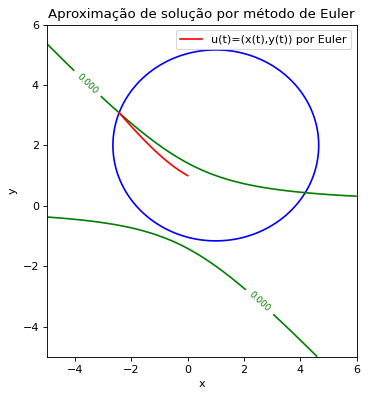

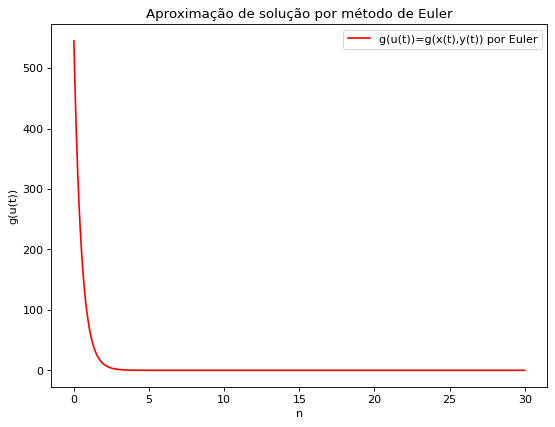

In [ ]:
Newton([0,1],0.001,30)

Observe que a estimativa era obter 
$$g(u(b)\approx g(u_0)e^{-2b}$$ que é 

In [ ]:
print(g([0,1])*np.exp(-2*30))

4.7722983656696036e-24


Deixando $h=1$ e matendo $u_0$ e $b$, temos uma estomativa ainda melhor para uma solução de $F(u)=0$, com apenas 30 iterações.

Solucao aproximada u=[-2.43159921  3.08078451]
Gradiente no ponto aproximado Gradg(u)=[-2.73628631e-15 -3.31287868e-15]
Valor aproximado de F(u)=[ 0.0000000e+00 -8.8817842e-16]
Valor aproximado de g(u)=3.944304526105059e-31


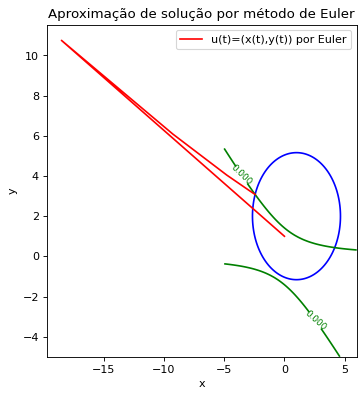

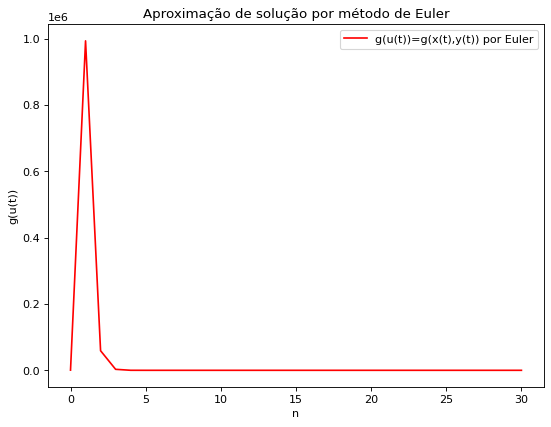

In [ ]:
Newton([0,1],1,30)

#**Olhando para a Equação $(5)$ com Runge-Kutta**

Testamos resolver novamente a Equação $(2)$, usando o método de Runge-Kutta de ordem 2, inicinando também em $u_0=(0,1)$, $h=0.01$ e estimar $u(b)$, também com $b=30$.

In [ ]:
def NewtonRK2(u0,h,b):
  n=int(b/h)
  u=[]
  ye=[]
  xe=[]
  fu=[]
  u.append(u0)
  ye.append(u[0][1])
  xe.append(u[0][0])
  fu.append(g(u[0]))
  t=np.linspace(0,b,n+1)
  
  for i in range(1,n+1):
    v=-np.dot( iJF(u[i-1]),F(u[i-1]) ) 
    w=-np.dot( iJF(u[i-1]+h*v),F(u[i-1]+h*v) ) 
    u.append( u[i-1]+h*(v+w)/2 )                           # RK2
    xe.append(u[i][0])
    ye.append(u[i][1])
    fu.append(g(u[i]))


  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')
  # Criando a figura e projeção em 3D
  ig, ax = plt.subplots(figsize=(5,5.5), dpi=80)
  CS = ax.contour(xf, yf, wg1,[0],colors='blue')
  CS = ax.contour(xf, yf, wg2,[0],colors='green')
  ax.clabel(CS, inline=0.5, fontsize=8)
  ax.set_title('Curvas de ni­vel de g') 
  plt.plot(xe,ye,color='red',label='u(t)=(x(t),y(t)) Runge-Kutta 2')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.title('Aproximação de solução por Runge-Kutta 2')
  plt.show()

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])    
  
  line_plotted = lines_plotted[0]


  plt.plot(t,fu,color='red',label='g(u(t))=g(x(t),y(t)) Runge-Kutta 2')
  plt.ylabel('g(u(t))')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de solução por Runge-Kutta 2')
  plt.show()
  

Observamos que o método de Runge-Kutta de ordem 2 nos dá aproximação de ordem melhor que o método de Euler, para uma raiz da equação, com $h$ 10 vezes maior.

Solucao aproximada u=[-2.43159921  3.08078451]
Gradiente no ponto aproximado Gradg(u)=[ 6.35122442e-11 -2.71171599e-11]
Valor aproximado de F(u)=[-3.09796633e-12 -8.88178420e-14]
Valor aproximado de g(u)=4.802641988970696e-24


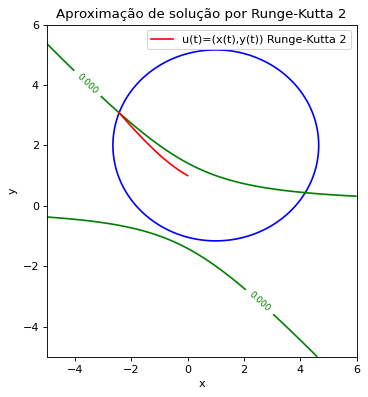

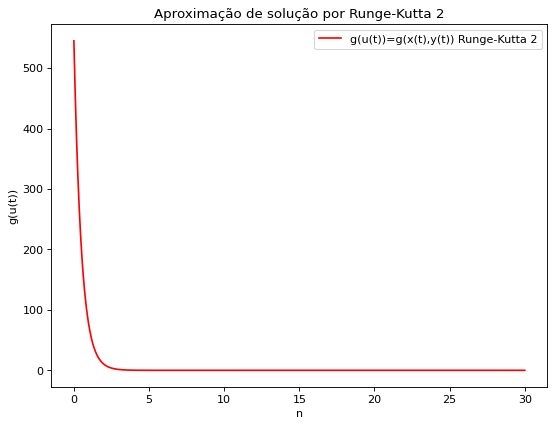

In [ ]:
NewtonRK2([0,1],0.01,30)

Com $h=1$ a precisão é pior que a do método de Euler.

Solucao aproximada u=[-2.43159921  3.08078451]
Gradiente no ponto aproximado Gradg(u)=[-1.94608412e-06  7.69624407e-07]
Valor aproximado de F(u)=[ 9.31000130e-08 -9.47568157e-09]
Valor aproximado de g(u)=4.378700483931645e-15


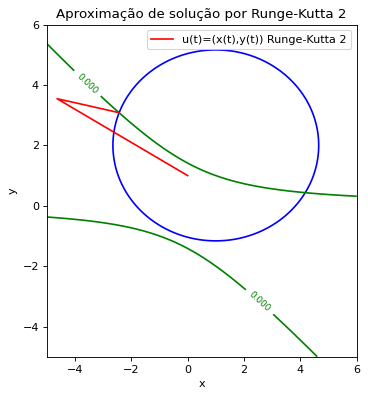

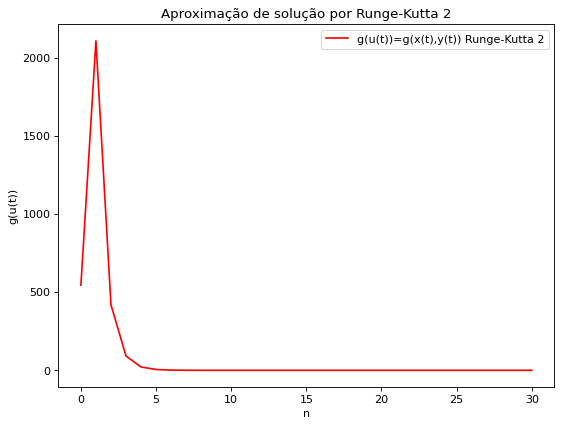

In [ ]:
NewtonRK2([0,1],1,30)

#**Referência:**

1. Ferreira, José Claudinei (2021). «QUANDO OS MÉTODOS DE EULER E DE NEWTON COINCIDEM» (PDF). Revista Matemática Universitária (1): 34–46. doi:[10.21711/26755254/rmu20213](https://rmu.sbm.org.br/wp-content/uploads/sites/11/sites/11/2021/11/3-Quandos-os-metodos-de-Eules-e-Newton-coinciden.pdf).

2. I. M. Ross, An optimal control theory for nonlinear optimization, Journal of Computational and Applied Mathematics, Volume 354, 39-51, 2019. https://doi.org/10.1016/j.cam.2018